In [ ]:
import numpy as np
import matplotlib.pyplot as plt

 Vediamo adesso un esempio teorico relativo al problema della scomparsa del gradiente, un problema molto comune che si manifesta nell'allenare reti neurali molto profonde oppure reti neurali ricorrenti che modellano sequenze molto lunghe.

Per questo esempio, userai una Sigmoide come funzione di attivazione e creerai dei dati sintetici per fare questo piccolo esperimento

In [ ]:
# Data
# Intervallo [-5, 5]
x = np.linspace(-5, 5, 100)  # creiamo un vettore di 100 valori equidistanti tra loro, con estremi compresi tra -5 e 5


In [ ]:
# Funzione di attivazione
# Intervallo [0, 1]
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

activations = sigmoid(x)


In [ ]:
# Funzione che calcola il gradiente della sigmoide
# Intervallo [0, 0.25]
def sigmoid_gradient(x):
    return (x) * (1 - x)

gradients = sigmoid_gradient(activations)


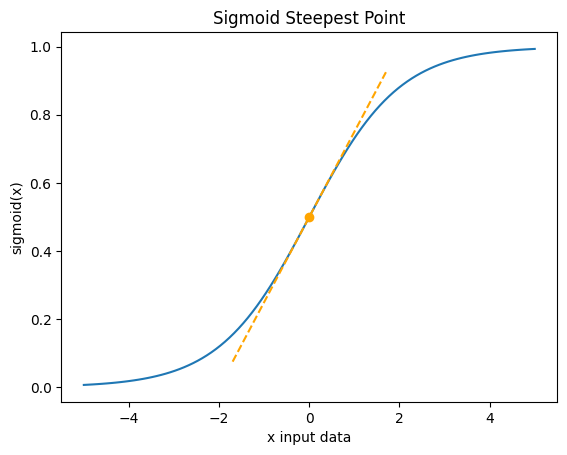

In [ ]:
# Facciamo un plot della funzione di attivazione (sigmoide)
plt.plot(x, activations)
plt.title("Sigmoid Steepest Point")
plt.xlabel("x input data")
plt.ylabel("sigmoid(x)")

# Aggiungiamo anche la linea tangente in un punto (la cui direzione rappresenta il gradiente della funzione)
x_tan = 0   # fissiamo come x della tangente il punto 0 ad esempio
y_tan = sigmoid(x_tan)  # valore y della tangente
span = 1.7              # lunghezza della linea lungo l'asse x
data_tan = np.linspace(x_tan - span, x_tan + span)  # x values to plot
gradient_tan = sigmoid_gradient(sigmoid(x_tan))     # gradient of the tangent
tan = y_tan + gradient_tan * (data_tan - x_tan)     # y values to plot
plt.plot(x_tan, y_tan, marker="o", color="orange", label=True)  # marker
plt.plot(data_tan, tan, linestyle="--", color="orange")         # line
plt.show()


# Mettiamo adesso a confronto i grafici del nostro input x, la funzione sigmoide e il gradiente della funzione sigmoide

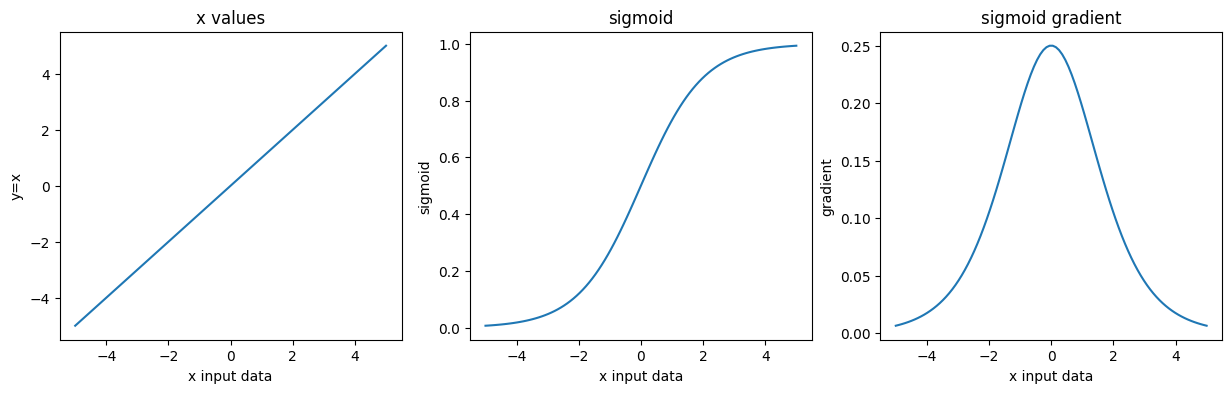

In [ ]:
# Sub plots
fig, axs = plt.subplots(1, 3, figsize=(15, 4), sharex=True)

# X values
axs[0].plot(x, x)
axs[0].set_title("x values")
axs[0].set_ylabel("y=x")
axs[0].set_xlabel("x input data")

# Sigmoid
axs[1].plot(x, activations)
axs[1].set_title("sigmoid")
axs[1].set_ylabel("sigmoid")
axs[1].set_xlabel("x input data")

# Sigmoid gradient
axs[2].plot(x, gradients)
axs[2].set_title("sigmoid gradient")
axs[2].set_ylabel("gradient")
axs[2].set_xlabel("x input data")

fig.show()


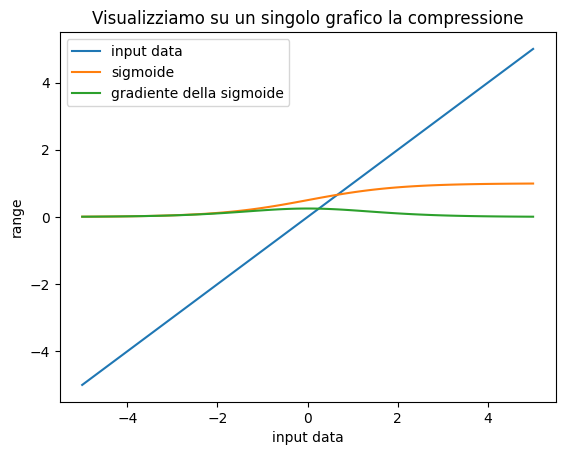


Valore massimo dati di input : 5.0
Valore minimo dati di input : -5.0 

Valore massimo sigmoide : 0.993
Valore minimo sigmoide : 0.007 

Valore massimo gradienti : 0.250
Valore minimo gradienti : 0.007


In [ ]:
# Single plot
plt.plot(x, x, label="input data")
plt.plot(x, activations, label="sigmoide")
plt.plot(x, gradients, label="gradiente della sigmoide")
plt.legend(loc="upper left")
plt.title("Visualizziamo su un singolo grafico la compressione")
plt.xlabel("input data")
plt.ylabel("range")
plt.show()

# Max, Min of each array
print("")
print("Valore massimo dati di input :", np.max(x))
print("Valore minimo dati di input :", np.min(x), "\n")
print("Valore massimo sigmoide :", "{:.3f}".format(np.max(activations)))
print("Valore minimo sigmoide :", "{:.3f}".format(np.min(activations)), "\n")
print("Valore massimo gradienti :", "{:.3f}".format(np.max(gradients)))
print("Valore minimo gradienti :", "{:.3f}".format(np.min(gradients)))


# Proviamo ora a simulare (come se fossimo in uno step di backpropagation) la scomparsa del gradiente

-- Inputs --
steps : 6
valore di input : 0
sigmoide : 0.50000
gradiente : 0.25000 

-- Loop --
step 1 : 0.25
step 2 : 0.0625
step 3 : 0.015625
step 4 : 0.00390625
step 5 : 0.0009765625
step 6 : 0.000244140625



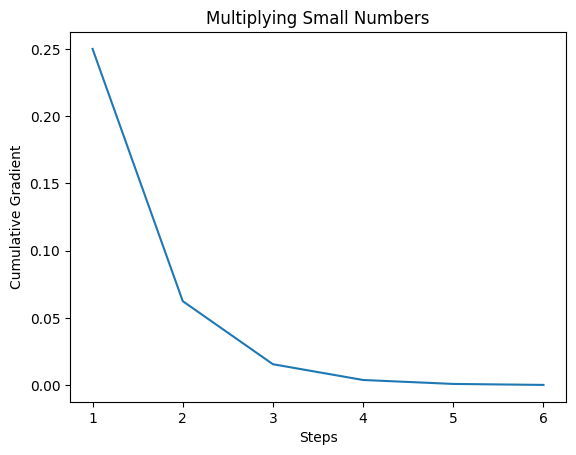

In [ ]:
n = 6  # numero di step di backpropagation
x = 0  # valore di input

grad = sigmoid_gradient(sigmoid(x))
steps = np.arange(1, n + 1)
print("-- Inputs --")
print("steps :", n)
print("valore di input :", x)
print("sigmoide :", "{:.5f}".format(sigmoid(x)))
print("gradiente :", "{:.5f}".format(grad), "\n")

# Calcoliamo il gradiente accumulato dopo ogni step del loop
print("-- Loop --")
vals = []
total_grad = 1
for s in steps:
    total_grad = total_grad * grad
    vals.append(total_grad)
    print("step", s, ":", total_grad)

print("")

# Plot
plt.plot(steps, vals)
plt.xticks(steps)
plt.title("Multiplying Small Numbers")
plt.xlabel("Steps")
plt.ylabel("Cumulato Gradiente")
plt.show()
